# Prediction correlation

In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import squidpy as sq
from scipy.sparse import csr_matrix
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

## Load real data

In [2]:
real_adata = sc.read_h5ad('../data/xenium_preview_rep1_wholecell/singlecell_normalized.h5ad')
real_df = real_adata.to_df()

In [3]:
pred_adata = sc.read_h5ad('../outputs/final_noref_wholecell/validation-final.h5ad')
pred_df = pred_adata.to_df()

In [4]:
sc.pp.calculate_qc_metrics(pred_adata, percent_top=(50, 100, 200, 300), inplace=True)

In [5]:
sorted_real_df = real_df.loc[real_df.index.isin(real_df.index)].sort_index()

In [6]:
sorted_pred_df = pred_df.loc[pred_df.index.isin(real_df.index)].sort_index()

In [7]:
spr = [stats.spearmanr(sorted_real_df.loc[:,[c]], sorted_pred_df.loc[:,[c]]) for c in sorted_pred_df.columns]

In [8]:
corr = []
pval = []
gnamme = []
for c in sorted_pred_df.columns:
    spr = stats.spearmanr(sorted_real_df.loc[:,[c]], sorted_pred_df.loc[:,[c]])
    corr.append(spr[0])
    pval.append(spr[1])
    gnamme.append(c)

In [9]:
sorted_real_df.sum(axis=0)

ABCC11    48360.417969
ACTA2     85272.289062
ACTG2     89765.781250
ADAM9     65046.304688
ADGRE5    23348.791016
              ...     
VWF       22923.246094
WARS      44342.910156
ZEB1      28736.632812
ZEB2      66920.937500
ZNF562    43149.394531
Length: 313, dtype: float32

In [10]:
corrDf = pd.DataFrame({'corr':corr, "pval":pval, "gene":gnamme, "sum": sorted_real_df.sum(axis=0)})

0.18591140893734093


<Axes: xlabel='corr', ylabel='Count'>

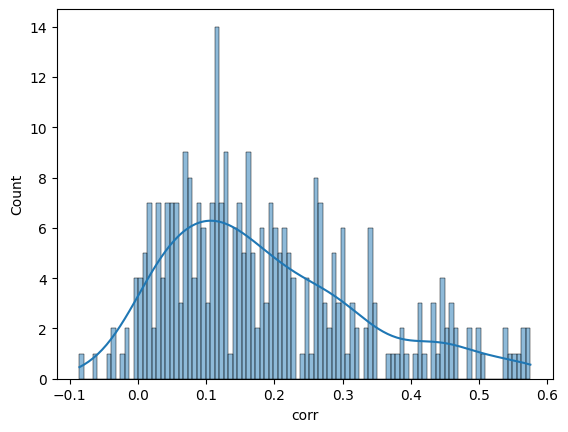

In [11]:
print(corrDf['corr'].mean())
sns.histplot(corrDf['corr'], bins=100, kde=True)

0.008278541856035736


<Axes: xlabel='pval', ylabel='Count'>

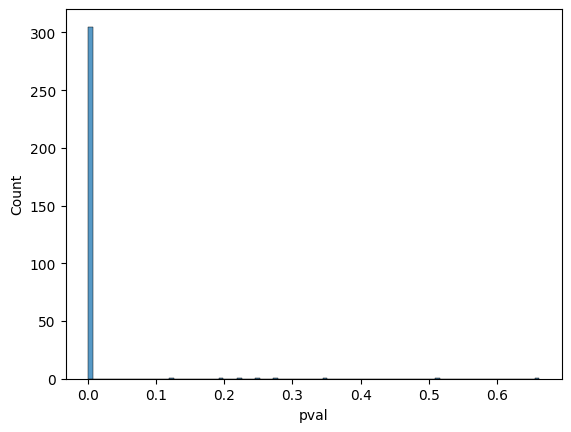

In [12]:
print(corrDf['pval'].mean())
sns.histplot(corrDf['pval'], bins=100)

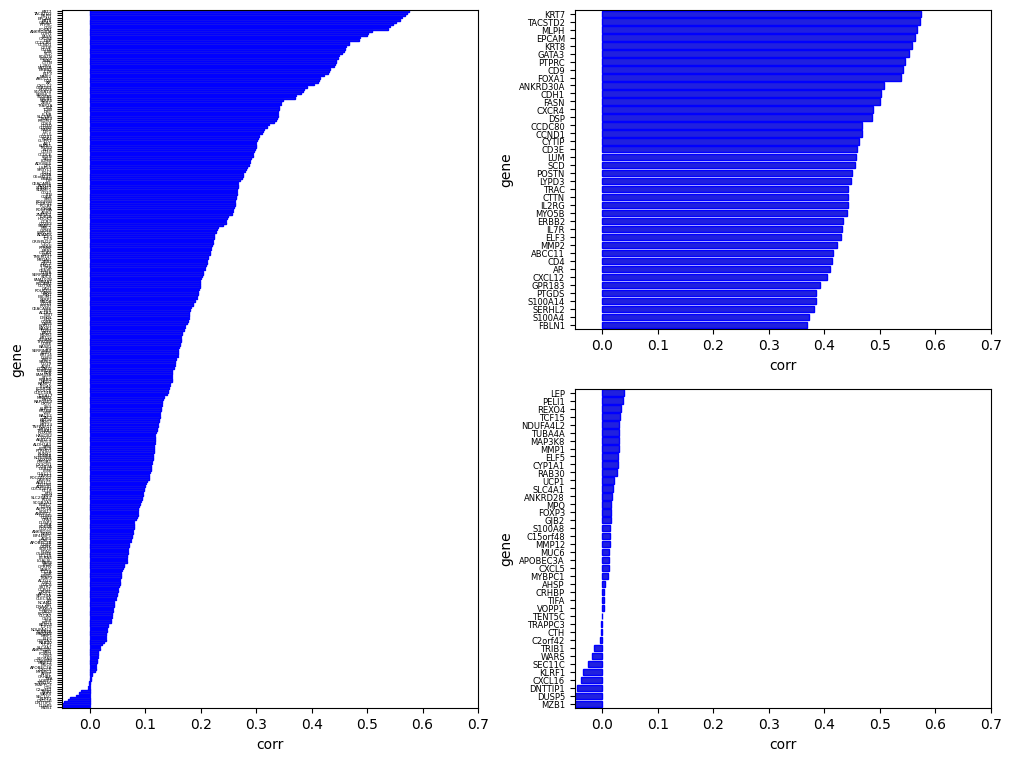

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(10, 7.5))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

b = sns.barplot(data=corrDf.sort_values('corr', ascending=False), x="corr", y="gene", color='blue', edgecolor='blue', ax=ax1) \
    .tick_params(axis='y', labelsize=3)
sns.barplot(data=corrDf.nsmallest(40, 'corr').sort_values('corr', ascending=False), x="corr", y="gene", color='blue', edgecolor='blue', ax=ax3) \
    .tick_params(axis='y', labelsize=6)

sns.barplot(data=corrDf.sort_values('corr', ascending=False).nlargest(40, 'corr'), x="corr", y="gene", color='blue', edgecolor='blue', ax=ax2) \
    .tick_params(axis='y', labelsize=6)

ax1.set_xlim(-0.05,0.7);
ax2.set_xlim(-0.05,0.7);
ax3.set_xlim(-0.05,0.7);

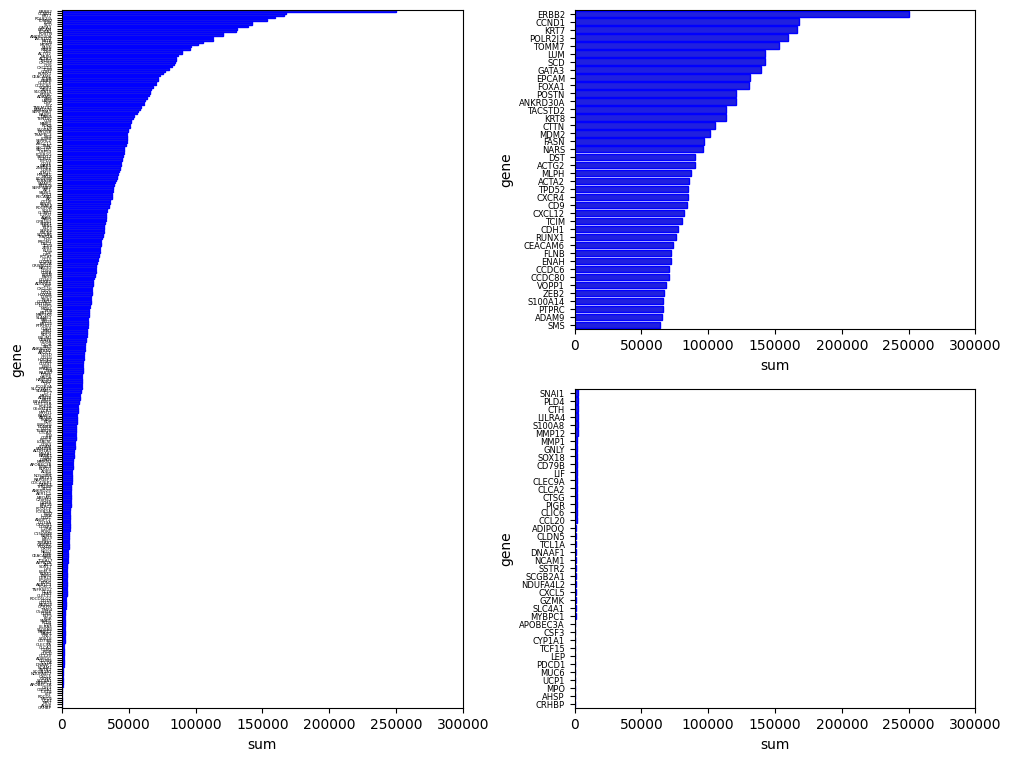

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(10, 7.5))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])

b = sns.barplot(data=corrDf.sort_values('sum', ascending=False), x="sum", y="gene", color='blue', edgecolor='blue', ax=ax1) \
    .tick_params(axis='y', labelsize=3)
sns.barplot(data=corrDf.nsmallest(40, 'sum').sort_values('sum', ascending=False), x="sum", y="gene", color='blue', edgecolor='blue', ax=ax3) \
    .tick_params(axis='y', labelsize=6)

sns.barplot(data=corrDf.sort_values('sum', ascending=False).nlargest(40, 'sum'), x="sum", y="gene", color='blue', edgecolor='blue', ax=ax2) \
    .tick_params(axis='y', labelsize=6)

ax1.set_xlim(-0.05,300000);
ax2.set_xlim(-0.05,300000);
ax3.set_xlim(-0.05,300000);

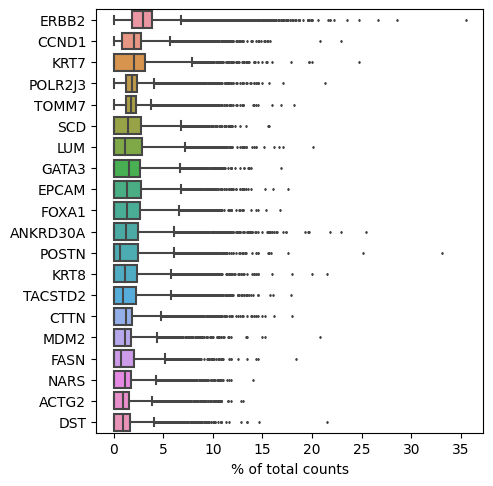

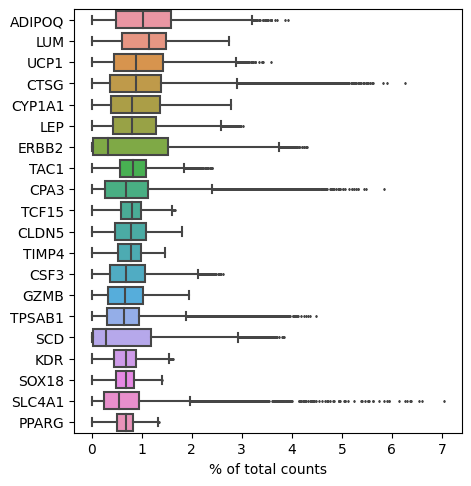

In [15]:
# fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sc.pl.highest_expr_genes(real_adata, n_top=20)
sc.pl.highest_expr_genes(pred_adata, n_top=20)

In [16]:
# # real_adata.layers["counts"] = np.expm1(real_adata.X.copy())
# sc.pp.normalize_total(real_adata, inplace=True)
# sc.pp.log1p(real_adata)

2023-04-01 08:03:06.228068: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-01 08:03:06.782020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/anaconda3/envs/st2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


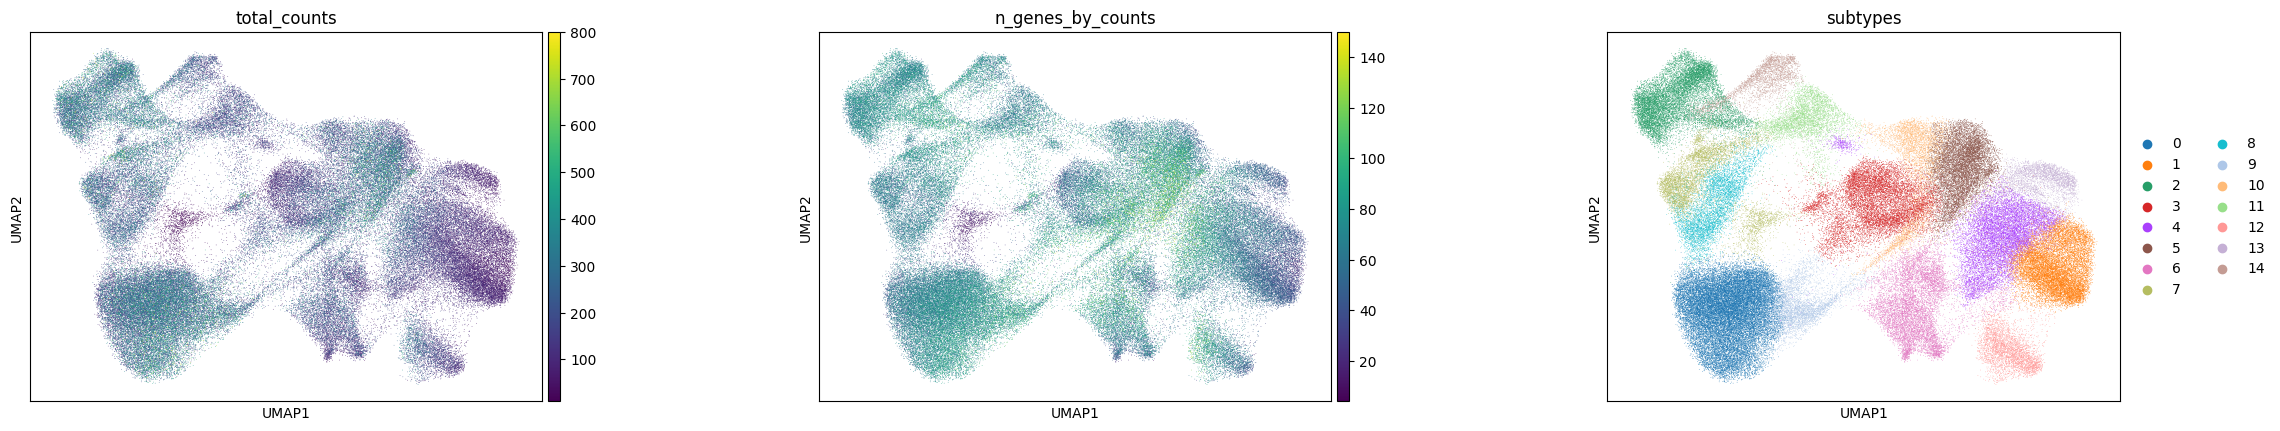

In [17]:
sc.pp.neighbors(real_adata)
sc.tl.umap(real_adata)
sc.tl.leiden(real_adata, key_added="subtypes")
sc.pl.umap(
    real_adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "subtypes",
    ],
    wspace=0.4,
)

In [18]:

# sc.pp.normalize_total(pred_adata, inplace=True)
# sc.pp.log1p(pred_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/opt/anaconda3/envs/st2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


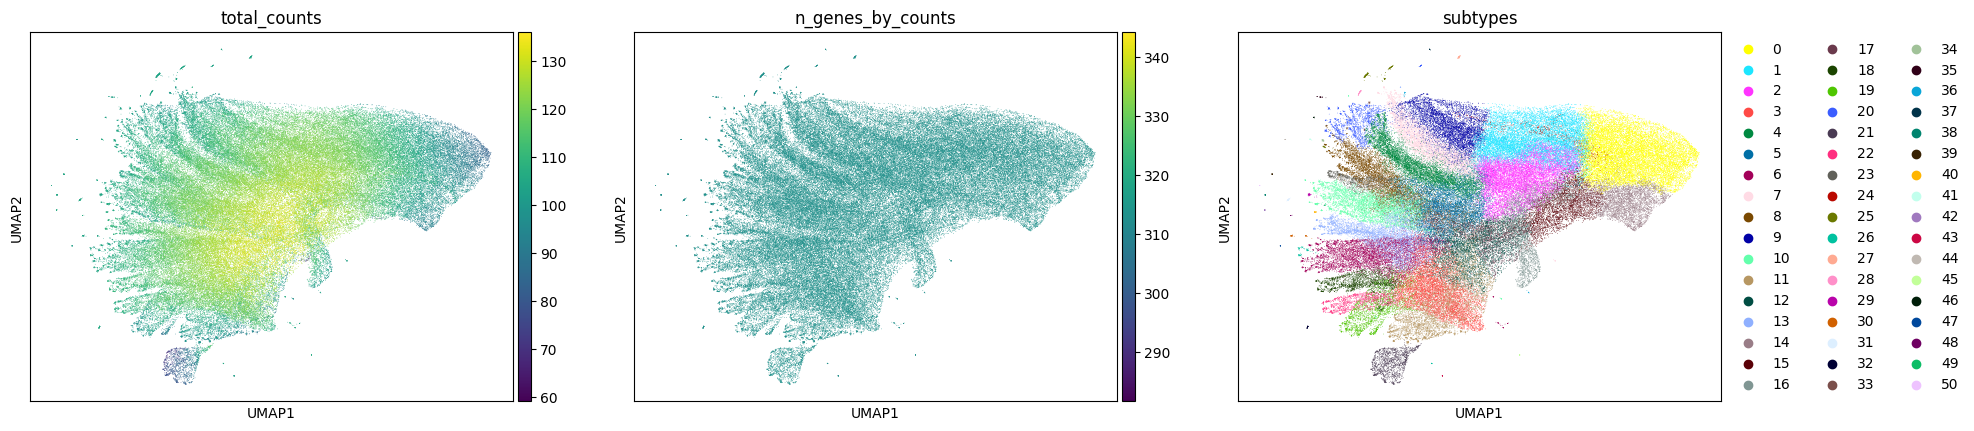

In [19]:
sc.pp.neighbors(pred_adata)
sc.tl.umap(pred_adata)
sc.tl.leiden(pred_adata, key_added="subtypes", resolution = 0.5)
sc.pl.umap(
    pred_adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "subtypes",
    ],
)